In [11]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score
import sys
import os

# cargar datos
df = pd.read_csv("../data/processed/clientes_banco.csv")

x = df.drop("permanencia", axis=1)
y = df["permanencia"]

# codificar variables categóricas
variables_categoricas = ["genero", "nivel_educativo", "estado_civil", "banda_salarial", "categoria_tarjeta"]
codificacion = OneHotEncoder(handle_unknown='ignore')
x_codificadas = pd.DataFrame(codificacion.fit_transform(x[variables_categoricas]).toarray(), columns=codificacion.get_feature_names(variables_categoricas))
x = x.drop(variables_categoricas, axis=1)
x = pd.concat([x, x_codificadas], axis=1)
x


,edad,num_personas_dependientes,num_meses_cliente,productos_financieros_contratados,num_meses_inactivo_12_meses,veces_contactado_12_meses,limite_credito,saldo_pendiente_tarjeta,credito_disponible,dif_cantidad_gastada_trimestre,...,banda_salarial_$120K +,banda_salarial_$40K - $60K,banda_salarial_$60K - $80K,banda_salarial_$80K - $120K,banda_salarial_Less than $40K,banda_salarial_Unknown,categoria_tarjeta_Blue,categoria_tarjeta_Gold,categoria_tarjeta_Platinum,categoria_tarjeta_Silver
0,49,3,43,4,4,0,23032.0,1960,21072.0,0.619,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
1,41,3,34,5,3,3,34516.0,2053,32463.0,1.034,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,53,3,34,6,2,2,2940.0,1264,1676.0,0.562,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,44,2,32,3,3,3,3031.0,1879,1152.0,0.788,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
4,44,3,25,3,3,0,1862.0,0,1862.0,0.883,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10022,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10023,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10024,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
10025,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=50)

# entrenar modelo de árbol de decisión
modelo_arbol_decisiones = DecisionTreeClassifier()
modelo_arbol_decisiones.fit(x, y)


# Prediccion con el conjunto de prueba
y_prediccion = modelo_arbol_decisiones.predict(x_test)

# Evaluacion de la precision
accuracy = accuracy_score(y_test, y_prediccion)
print("Precisión del modelo: ", accuracy)

Precisión del modelo:  1.0


In [15]:
#PREDICCION REAL
df_datos_para_predecir = pd.read_csv("../data/processed/clientes_banco.csv")

x_prediccion = df_datos_para_predecir.drop("permanencia", axis=1)
y_prediccion = df_datos_para_predecir["permanencia"]

# codificar variables categóricas
variables_categoricas = ["genero", "nivel_educativo", "estado_civil", "banda_salarial", "categoria_tarjeta"]
codificacion = OneHotEncoder(handle_unknown='ignore')
x_codificadas = pd.DataFrame(codificacion.fit_transform(x_prediccion[variables_categoricas]).toarray(), columns=codificacion.get_feature_names(variables_categoricas))
x_prediccion = x_prediccion.drop(variables_categoricas, axis=1)
x_prediccion = pd.concat([x_prediccion, x_codificadas], axis=1)

nueva_prediccion = modelo_arbol_decisiones.predict(x_prediccion)

#permite ver mas resultados en el print
np.set_printoptions(threshold=np.inf)


print(nueva_prediccion)


['Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Attrited Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Attrited Customer' 'Existing Customer'
 'Existing Customer' 'Existing Customer' 'Attrited Customer'
 'Attrited Customer' 'Existing Customer' 'Existing Customer'
 'Existing Customer' 'Ex

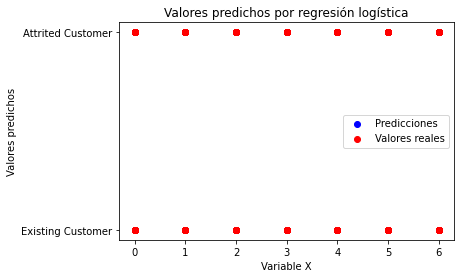

In [35]:
import matplotlib.pyplot as plt

# Gráfico 1: valores predichos por regresión logística
plt.scatter(x_prediccion['num_meses_inactivo_12_meses'], nueva_prediccion, color='blue')
plt.scatter(x_prediccion['num_meses_inactivo_12_meses'], nueva_prediccion, color='red')
plt.xlabel('Variable X')
plt.ylabel('Valores predichos')
plt.title('Valores predichos por regresión logística')
plt.legend(['Predicciones', 'Valores reales'])
plt.show()
